In [15]:

# **Import Necessary Libraries**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Multiply, Softmax
import shap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Ensure dataset path is correct for Colab users
dataset_path = "/content/predictive_maintenance.csv"  # Modify this if needed


In [16]:

# **Dataset Overview & Basic Information**

# Load the dataset and ensure correct column names
df = pd.read_csv(dataset_path)

# Display available column names to verify 'Failure' exists
print("Available Columns:", df.columns.tolist())

# Drop unnecessary columns (only if they exist)
columns_to_drop = ["UDI", "Product ID"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Standardize column names to remove spaces or hidden characters
df.columns = df.columns.str.strip()

# Ensure 'Failure' column exists before proceeding
if "Failure Type" in df.columns:
    df["Failure"] = df["Failure Type"].apply(lambda x: 0 if x == "No Failure" else 1)
    df.drop(columns=["Failure Type", "Target"], inplace=True, errors='ignore')
else:
    print("⚠️ Warning: 'Failure Type' column not found in dataset!")

# Display Dataset Shape and Basic Statistics
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())

# Check Missing Values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Display First Few Rows
df.head()


Available Columns: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']
Dataset Shape: (10000, 7)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure                  10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB
None

Missing Values in Dataset:
Type                       0
Air temperature [K]        0
Process temperature [K]    

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [17]:

# Display Basic Dataset Parameters

# General statistics
print("Dataset Overview:\n")
print(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check class distribution
print("\nFailure Type Distribution:")
print(df["Failure"].value_counts())


Dataset Overview:

       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]       Failure  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.034800  
std        9.968934        63.654147      0.183282  
min        3.800000         0.000000      0.000000  
25% 

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Multiply, Softmax
import shap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [19]:

# Load the dataset
df = pd.read_csv("/content/predictive_maintenance.csv")

# Drop unnecessary columns
df.drop(columns=["UDI", "Product ID"], inplace=True)

# Encode categorical features
le_type = LabelEncoder()
df["Type"] = le_type.fit_transform(df["Type"])

# Convert failure type into binary target (0 = No Failure, 1 = Failure)
df["Failure"] = df["Failure Type"].apply(lambda x: 0 if x == "No Failure" else 1)
df.drop(columns=["Failure Type", "Target"], inplace=True)

# Normalize numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Failure"]))
df_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=["Failure"]).columns)
df_scaled["Failure"] = df["Failure"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(columns=["Failure"]), df_scaled["Failure"], test_size=0.2, random_state=42)

print("Data Preprocessing Complete!")
df_scaled.head()


Data Preprocessing Complete!


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure
0,1.333889,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0
1,-0.332223,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0
2,-0.332223,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0
3,-0.332223,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0
4,-0.332223,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0


In [20]:

# Define Attention Layer
class AttentionLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def call(self, inputs):
        attention_scores = Softmax()(inputs)  # Normalize attention scores
        return Multiply()([inputs, attention_scores])  # Apply attention

# Define Autoencoder Model with Attention
input_dim = X_train.shape[1]
encoding_dim = 6  # Bottleneck layer

input_layer = Input(shape=(input_dim,))
encoded = Dense(12, activation='relu')(input_layer)
encoded = AttentionLayer()(encoded)  # Apply Attention
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder with Attention
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Use reconstruction error as anomaly score
reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)

# Set anomaly threshold (mean + 2*std deviation)
threshold = np.mean(mse) + 2 * np.std(mse)

# Predict anomalies
anomalies = mse > threshold

print("Anomaly Detection with Attention Complete!")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9567 - val_loss: 0.6635
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5586 - val_loss: 0.3449
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2984 - val_loss: 0.1967
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1705 - val_loss: 0.1237
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1168 - val_loss: 0.0849
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0820 - val_loss: 0.0663
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0640 - val_loss: 0.0559
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0536 - val_loss: 0.0496
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0480 - val_loss: 0.0449
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0434 - val_loss: 0.0418
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0400 - val_loss: 0.0396
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

ExactExplainer explainer: 2001it [00:42, 35.34it/s]                          


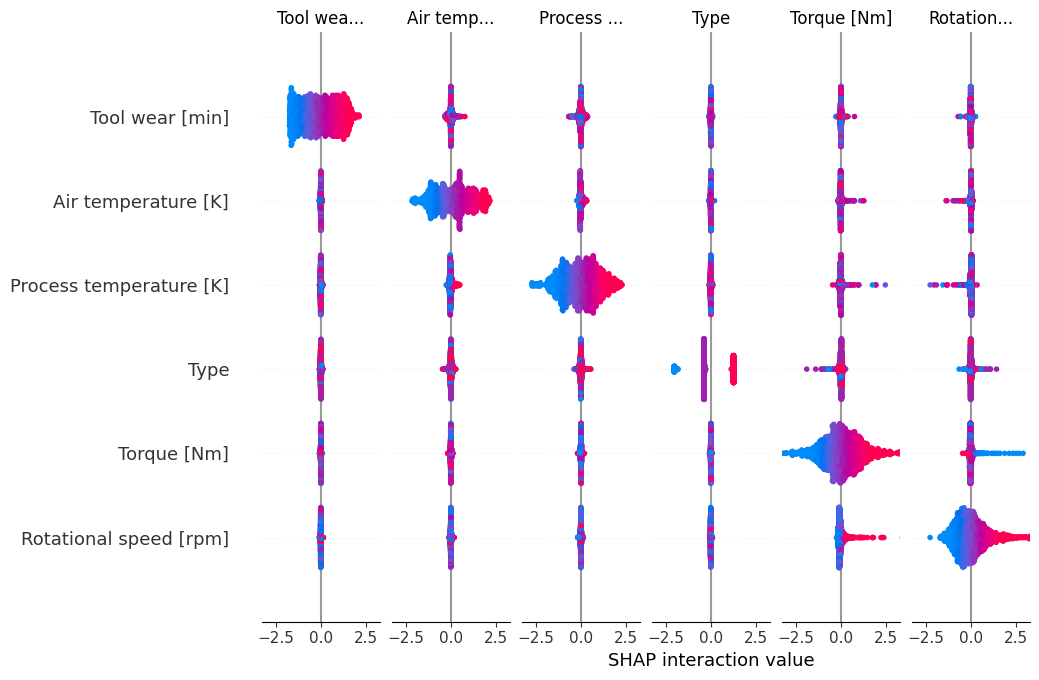

In [21]:

# Explainable AI (XAI) using SHAP

# Create SHAP explainer
explainer = shap.Explainer(autoencoder, X_test)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


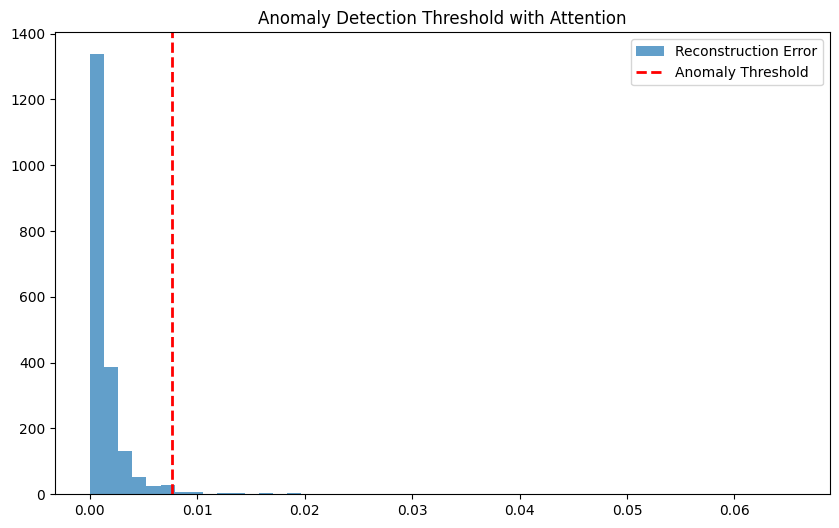

In [22]:

# Visualizing Anomalies
plt.figure(figsize=(10,6))
plt.hist(mse, bins=50, alpha=0.7, label="Reconstruction Error")
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="Anomaly Threshold")
plt.legend()
plt.title("Anomaly Detection Threshold with Attention")
plt.show()



# **Deployment Considerations**
- The model with **Attention Mechanisms** can improve real-time monitoring of industrial failures.
- Optimized for **TensorFlow Lite** deployment on edge devices.
- The attention weights provide **explainability** to industrial engineers.
- Future improvements include **continual learning** to adapt to new patterns.

**Next Steps:**
1. **Test model on different datasets.**
2. **Analyze attention weight distributions.**
3. **Optimize for deployment on IoT devices.**


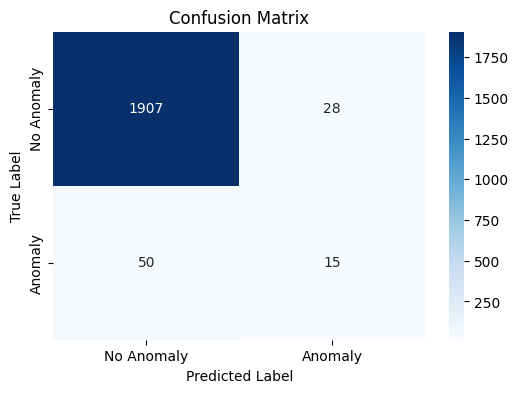

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1935
           1       0.35      0.23      0.28        65

    accuracy                           0.96      2000
   macro avg       0.66      0.61      0.63      2000
weighted avg       0.95      0.96      0.96      2000



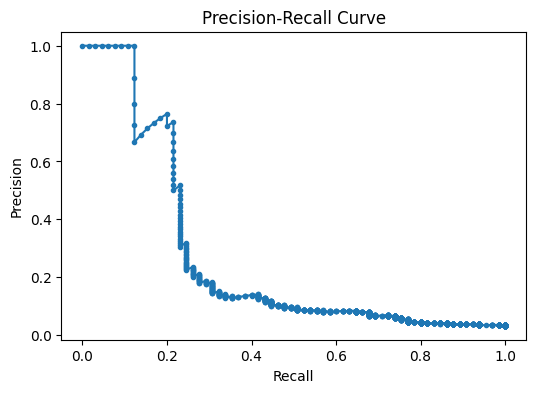

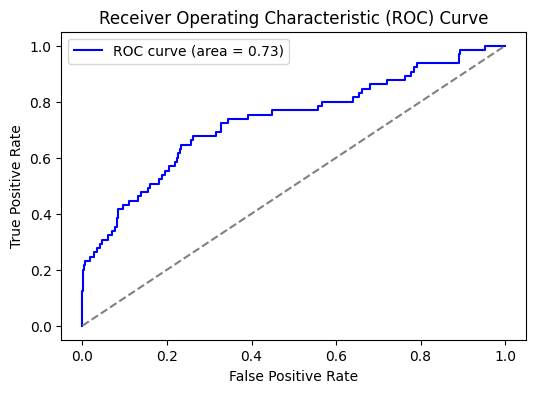

In [23]:

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import seaborn as sns

# Convert anomalies to binary labels for evaluation
y_pred = anomalies.astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Anomaly", "Anomaly"], yticklabels=["No Anomaly", "Anomaly"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, mse)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, mse)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


<ipython-input-24-55d37304779f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Failure"], palette="coolwarm")


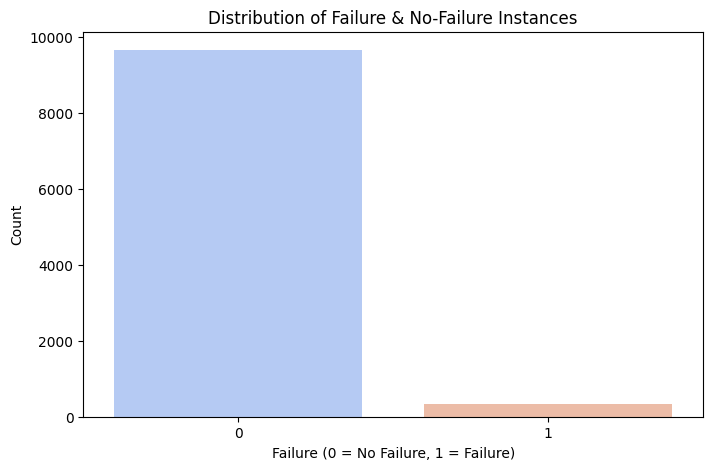

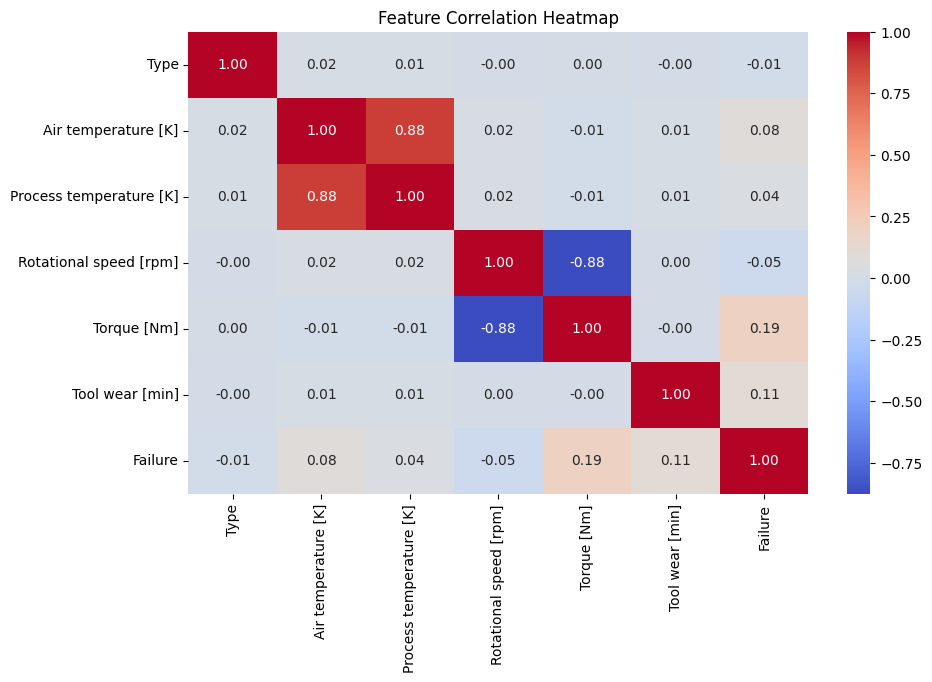

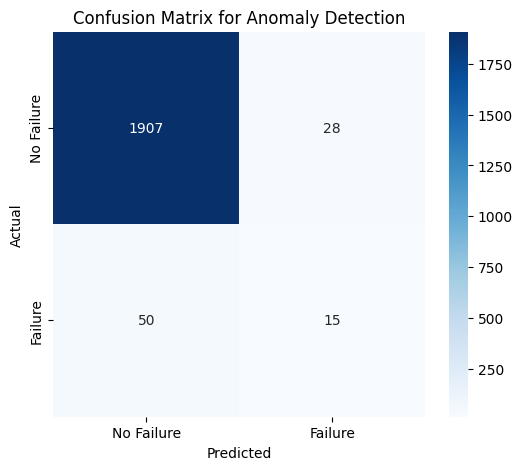

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1935
           1       0.35      0.23      0.28        65

    accuracy                           0.96      2000
   macro avg       0.66      0.61      0.63      2000
weighted avg       0.95      0.96      0.96      2000



In [24]:

# **Additional Visualizations**

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Distribution of Failure Types
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Failure"], palette="coolwarm")
plt.title("Distribution of Failure & No-Failure Instances")
plt.xlabel("Failure (0 = No Failure, 1 = Failure)")
plt.ylabel("Count")
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Confusion Matrix for Anomaly Detection
y_pred = anomalies.astype(int)  # Convert anomalies to binary labels
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Anomaly Detection")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


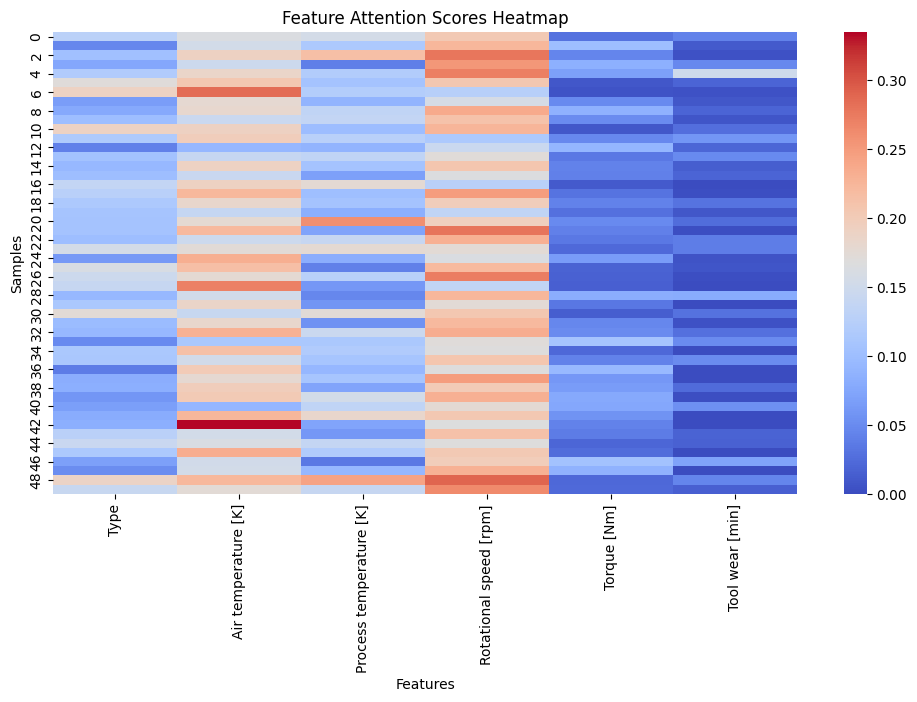

<ipython-input-25-ebc790a55786>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_attention.index, y=mean_attention.values, palette="viridis")


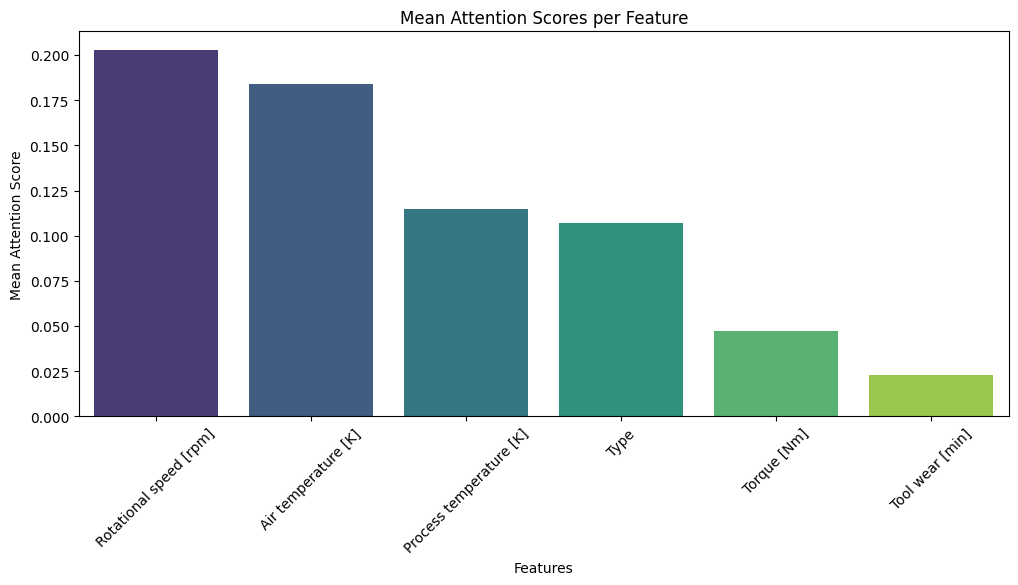

In [25]:

# **Extract and Visualize Attention Weights**

import tensorflow.keras.backend as K

# Function to Extract Attention Weights
def get_attention_weights(model, X_sample):
    attention_model = Model(inputs=model.input, outputs=model.get_layer(index=2).output)  # Extracting attention layer
    attention_scores = attention_model.predict(X_sample)

    # Ensure attention scores match the expected shape
    if attention_scores.shape[1] != X_sample.shape[1]:
        print(f"Warning: Expected {X_sample.shape[1]} attention weights but got {attention_scores.shape[1]}")
        attention_scores = attention_scores[:, :X_sample.shape[1]]  # Trim to match expected shape

    return attention_scores

# Get attention weights for a sample
X_sample = X_test[:50]  # Take first 50 test samples
attention_scores = get_attention_weights(autoencoder, X_sample)

# Convert attention scores to DataFrame for visualization
attention_df = pd.DataFrame(attention_scores, columns=X_test.columns[:attention_scores.shape[1]])

# Plot Heatmap of Attention Scores
plt.figure(figsize=(12, 6))
sns.heatmap(attention_df, cmap="coolwarm", annot=False, xticklabels=X_test.columns[:attention_scores.shape[1]])
plt.title("Feature Attention Scores Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

# Plot Mean Attention Scores as a Bar Chart
mean_attention = attention_df.mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=mean_attention.index, y=mean_attention.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Mean Attention Scores per Feature")
plt.xlabel("Features")
plt.ylabel("Mean Attention Score")
plt.show()
